# Analyzing Ford GoBike Data
## by Zhenghao Xiao

## 1. Preliminary Wrangling

> Ford GoBike is a regional public bicycle sharing system located in San Francisco Bay Area, California. In this project, history data of the whole 2018 year was used.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

### 1.1 Gathering data

This dataset is of big size, and separated by 12 months, so I need to combine them in the first step.

In [15]:
path = r'/Users/zhenghaoxiao/Documents/udacity/communicate_data_findings/bikedata'
files = glob.glob(os.path.join(path, '*.csv'))

In [16]:
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

In [17]:
df.to_csv('bike.csv', index=False)

### 1.2 Assessing data

In [18]:
df = pd.read_csv('bike.csv')

Now, let's have a glimpse of the dataset:

In [19]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [23]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1604811,929,2018-10-03 08:54:48.7790,2018-10-03 09:10:18.0390,58.0,Market St at 10th St,37.776619,-122.417385,22.0,Howard St at Beale St,37.789756,-122.394643,3848,Subscriber,1988.0,Male,No
26463,333,2018-02-21 12:23:08.9550,2018-02-21 12:28:42.0880,195.0,Bay Pl at Vernon St,37.812314,-122.260779,182.0,19th Street BART Station,37.809013,-122.268247,2687,Subscriber,1976.0,Male,Yes
1612015,694,2018-10-02 09:38:45.1100,2018-10-02 09:50:20.0920,61.0,Howard St at 8th St,37.776513,-122.411306,37.0,2nd St at Folsom St,37.785000,-122.395936,3284,Subscriber,1992.0,Male,No
1832131,332,2018-04-09 13:43:14.6010,2018-04-09 13:48:47.3960,337.0,Webster St at 19th St,37.806970,-122.266588,195.0,Bay Pl at Vernon St,37.812314,-122.260779,569,Subscriber,1970.0,Female,Yes
1244806,664,2018-08-29 12:08:10.1640,2018-08-29 12:19:14.9360,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,79.0,7th St at Brannan St,37.773492,-122.403672,2478,Customer,1987.0,Female,No
1222788,403,2018-07-02 09:10:42.7240,2018-07-02 09:17:26.0590,245.0,Downtown Berkeley BART,37.870348,-122.267764,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3316,Subscriber,1976.0,Female,No
1424915,282,2018-10-31 09:30:42.0440,2018-10-31 09:35:24.1110,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,3778,Subscriber,1981.0,Male,No
845119,310,2018-12-19 07:53:19.1150,2018-12-19 07:58:29.5660,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,22.0,Howard St at Beale St,37.789756,-122.394643,3568,Subscriber,1981.0,Male,No
750675,346,2018-05-09 18:35:41.4690,2018-05-09 18:41:28.0670,181.0,Grand Ave at Webster St,37.811377,-122.265192,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,311,Customer,1967.0,Male,No
414202,1021,2018-09-04 11:17:55.7020,2018-09-04 11:34:57.6950,323.0,Broadway at Kearny,37.798014,-122.405950,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2193,Subscriber,1994.0,Male,No


Check data type of columns:

In [33]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [25]:
df.shape

(1863721, 16)

Duplicated values check:

In [21]:
df.duplicated().sum()

0

Missing values check:

In [24]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [22]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


By assessing the dataset, there are some data quality issues in this dataset:

* Missing values exist in **start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year**, and **member_gender** columns

* Data type errors:  
    - should be object: **start_station_id, end_station_id, bike_id**
    - should be category: **user_type, member_gender, bike_share_for_all_trip** (notice that is not a real problem, it just makes future usage of those data more convenient)
    - should be timestamp: **strat_time, end_time**
    - should be int: **member_birth_year**

* Unrealistic birth year exists in **member_birth_year**
* Data are not sorted by time order

### 1.3 Cleaning data

Make a copy of the original dataset:

In [26]:
df_cleaned = df.copy()

Let's first fix the data type problems:

* Data type errors:  
    - should be object: **start_station_id, end_station_id, bike_id**
    - should be category: **user_type, member_gender, bike_share_for_all_trip** (notice that is not a real problem, it just makes future usage of those data more convenient)
    - should be timestamp: **strat_time, end_time**
    
**Define**

Use pandas astype and to_datetime functions to convert the data type of those columns

**Code**

In [27]:
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)

In [28]:
df_cleaned.user_type = df_cleaned.user_type.astype('category')
df_cleaned.member_gender = df_cleaned.member_gender.astype('category')
df_cleaned.bike_share_for_all_trip = df_cleaned.bike_share_for_all_trip.astype('category')

In [29]:
df_cleaned.bike_id = df_cleaned.bike_id.astype(str)
df_cleaned.start_station_id = df_cleaned.start_station_id.astype(str)
df_cleaned.end_station_id = df_cleaned.end_station_id.astype(str)

**Test**

In [31]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [32]:
df_cleaned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
dtypes: category(3), datetime64[ns](2), float

I did not convert the member_birth_year column here because we can do some feature engineering on this column to make it more clear.

**Define**

Convert the member_birth_year to member_age which can make it more clear for our analysis

**Code**

In [35]:
df_cleaned['member_age'] = 2019 - df_cleaned['member_birth_year']

**Test**

In [36]:
df_cleaned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 17 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
member_age                 1753003 non-null f

**Define**

The problems with the age and birth year column is still existing: data type and outlier values

**Code**

In [37]:
df_cleaned.member_age.sort_values(ascending=False)

1091679    138.0
1092151    138.0
1092302    138.0
1089747    138.0
1091810    138.0
1294316    131.0
1322576    131.0
1317862    131.0
1606045    131.0
818596     131.0
1530050    131.0
1552308    131.0
1310526    131.0
1310273    131.0
1559825    131.0
1308925    131.0
1316379    131.0
1601597    131.0
1590379    131.0
1574665    131.0
1548505    131.0
263801     131.0
1593757    131.0
1301375    131.0
1598040    131.0
1555818    131.0
1310917    131.0
1294365    131.0
727584     130.0
746835     130.0
           ...  
1863391      NaN
1863392      NaN
1863430      NaN
1863431      NaN
1863444      NaN
1863445      NaN
1863490      NaN
1863491      NaN
1863538      NaN
1863539      NaN
1863540      NaN
1863541      NaN
1863542      NaN
1863555      NaN
1863605      NaN
1863606      NaN
1863637      NaN
1863641      NaN
1863645      NaN
1863649      NaN
1863651      NaN
1863661      NaN
1863662      NaN
1863663      NaN
1863673      NaN
1863683      NaN
1863684      NaN
1863689      N

There are many values higher than 100, which is abnormal, I need to set a threshold and delete those abnormal values higher than the threshold

In [38]:
df_cleaned.member_age.describe(percentiles = [.995])

count    1.753003e+06
mean     3.591204e+01
std      1.044289e+01
min      1.900000e+01
50%      3.400000e+01
99.5%    7.000000e+01
max      1.380000e+02
Name: member_age, dtype: float64

Since 70 years old will cover 99.5% of the age distribution, and the smallest age is 19, I decide to use 69 years old as the threshold

In [39]:
df_cleaned = df_cleaned.query('member_age <= 69')

Now we can convert the data type of those two columns to int

In [43]:
df_cleaned.member_age = df_cleaned.member_age.astype(int)
df_cleaned.member_birth_year = df_cleaned.member_birth_year.astype(int)

**Test**

In [44]:
df_cleaned.member_age.describe()

count    1.743806e+06
mean     3.567802e+01
std      9.900415e+00
min      1.900000e+01
25%      2.800000e+01
50%      3.400000e+01
75%      4.100000e+01
max      6.900000e+01
Name: member_age, dtype: float64

In [46]:
df_cleaned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743806 entries, 0 to 1863720
Data columns (total 17 columns):
duration_sec               1743806 non-null int64
start_time                 1743806 non-null datetime64[ns]
end_time                   1743806 non-null datetime64[ns]
start_station_id           1743806 non-null object
start_station_name         1732368 non-null object
start_station_latitude     1743806 non-null float64
start_station_longitude    1743806 non-null float64
end_station_id             1743806 non-null object
end_station_name           1732368 non-null object
end_station_latitude       1743806 non-null float64
end_station_longitude      1743806 non-null float64
bike_id                    1743806 non-null object
user_type                  1743806 non-null category
member_birth_year          1743806 non-null int64
member_gender              1743806 non-null category
bike_share_for_all_trip    1743806 non-null category
member_age                 1743806 non-null int

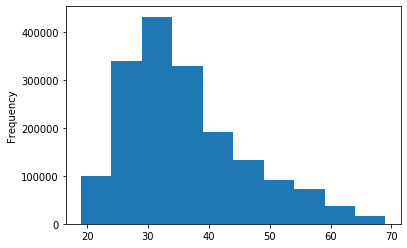

In [50]:
df_cleaned.member_age.plot.hist();

**Define**

Extract the month, day of the week, and hour from the start_time column. Calculate the duration in minutes. This is not a real data quality or tidiness problem, it just makes the later analysis easier.

**Code**

In [51]:
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month.astype(int)
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

**Test**

In [52]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,duration_min
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,Subscriber,1988,Male,No,31,February,2,Wed,23,9
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,Customer,1987,Male,No,32,February,2,Wed,23,15
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1986,Female,No,33,February,2,Wed,18,309
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1981,Male,No,38,February,2,Wed,18,309
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,Subscriber,1976,Female,Yes,43,February,2,Wed,23,14


In [53]:
df_cleaned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743806 entries, 0 to 1863720
Data columns (total 22 columns):
duration_sec               1743806 non-null int64
start_time                 1743806 non-null datetime64[ns]
end_time                   1743806 non-null datetime64[ns]
start_station_id           1743806 non-null object
start_station_name         1732368 non-null object
start_station_latitude     1743806 non-null float64
start_station_longitude    1743806 non-null float64
end_station_id             1743806 non-null object
end_station_name           1732368 non-null object
end_station_latitude       1743806 non-null float64
end_station_longitude      1743806 non-null float64
bike_id                    1743806 non-null object
user_type                  1743806 non-null category
member_birth_year          1743806 non-null int64
member_gender              1743806 non-null category
bike_share_for_all_trip    1743806 non-null category
member_age                 1743806 non-null int

**Define**
* Data is not sorted by time order

**Code**

In [65]:
df_cleaned = df_cleaned.sort_values(by='start_time')

**Test**

In [66]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,duration_min
1028327,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316.0,San Salvador St at 1st St,37.330165,-121.885831,311.0,Paseo De San Antonio at 2nd St,37.333798,...,Subscriber,1957,Male,No,62,January,1,Mon,0,2
1028326,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74.0,Laguna St at Hayes St,37.776435,-122.426244,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1986,Male,No,33,January,1,Mon,0,11
1028325,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97.0,14th St at Mission St,37.768265,-122.420110,125.0,20th St at Bryant St,37.759200,...,Subscriber,1992,Male,No,27,January,1,Mon,0,19
1028319,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11.0,Davis St at Jackson St,37.797280,-122.398436,323.0,Broadway at Kearny,37.798014,...,Customer,1995,Male,No,24,January,1,Mon,0,22
1028296,2603,2018-01-01 00:15:33.369,2018-01-01 00:58:56.522,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,8.0,The Embarcadero at Vallejo St,37.799953,...,Subscriber,1994,Male,Yes,25,January,1,Mon,0,43


### 1.4 Storing data

In [67]:
df_cleaned.to_csv('bike_clean.csv', index=False)

In [68]:
df = pd.read_csv('bike_clean.csv')


### What is the structure of your dataset?

> The cleaned dataset has 1743806 rows and 22 columns, including ID, name, latitude, longitude of start and end station, start time and data, end time and date, bike ID, user type, member year of birth and member gender.
In addition to the original 16 columns, I added 6 new columns derived from feature engineering: **member_age, start_time_month, start_time_month_num, start_time_weekday, start_time_hour, duration_min**.

### What is/are the main feature(s) of interest in your dataset?

> * Time date data can help us check which month of a year, which weekday of a week people tend to use this service, base on that, business decision on promotions can be made to improve the revenue. 
> * User data: user type, gender and age can be used to figure out which kind of people are willing to pay for this sharing bike product, advertisement strategy can be adjusted according to those findings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip duration can also be a good help, if we can find the trip duration distribution pattern, we can adjust the pricing strategy, and also predict the average lifetime of a random bicycle.

## 2. Univariate Exploration



**Question**
* What is the distribution of monthly usage of the Ford GoBike?

**Code**

In [77]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

base_color = sns.color_palette()[0]

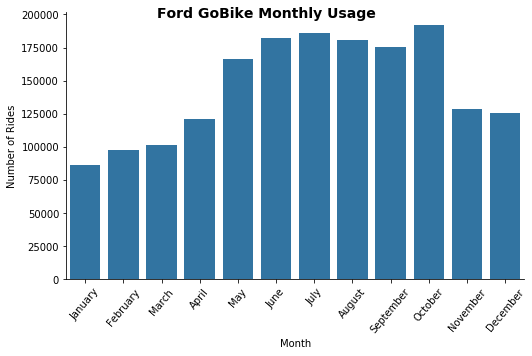

In [85]:
month_plt = sns.catplot(data=df, x='start_time_month', kind='count', color=base_color, aspect=1.5);
month_plt.set_axis_labels('Month', 'Number of Rides'),
month_plt.fig.suptitle('Ford GoBike Monthly Usage', fontsize=14, fontweight='bold');
month_plt.set_xticklabels(rotation=50);


* According to the plot, people tend to ride more frequently during Summer and mid autumn: May to October, in which October is the most popular month. January, February, and March are months with the lowest rides. This should be attributed to the weather and climate of Bay Area.

**Question**

* What is the distribution of weekly usage of the Ford GoBike?

**Code**

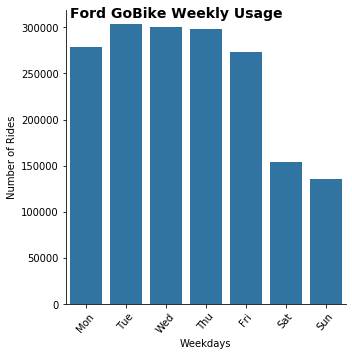

In [86]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week_plt = sns.catplot(data=df, x='start_time_weekday', kind='count', color=base_color, order=weekday)
week_plt.set_axis_labels('Weekdays', 'Number of Rides')

week_plt.fig.suptitle('Ford GoBike Weekly Usage', fontsize=14, fontweight='bold');

week_plt.set_xticklabels(rotation=50);


* This plot shows that people ride bike twice the frequency in weekdays than weekends. It indicates that most people ride Ford GoBike for commuting.

**Question**

* What is the distribution of hourly usage of the Ford GoBike?

**Code**

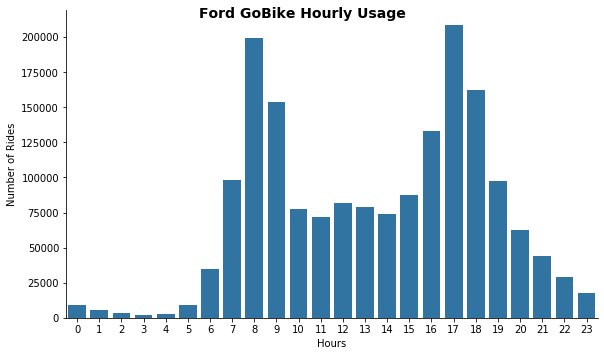

In [93]:
hour_plt = sns.catplot(data=df, x='start_time_hour', kind='count', color=base_color, aspect=1.7);

hour_plt.set_axis_labels('Hours', 'Number of Rides')

hour_plt.fig.suptitle('Ford GoBike Hourly Usage', fontsize=14, fontweight='bold');


* Most rides are occurring on rush hours. It enhanced the hypothesis we framed on the weekly plot: most usage of Ford GoBike is commuting.

**Question**

* What is the duration distribution of Ford GoBike data?

**Code**

In [89]:
df.duration_min.describe()

count    1.743806e+06
mean     1.247650e+01
std      3.310095e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

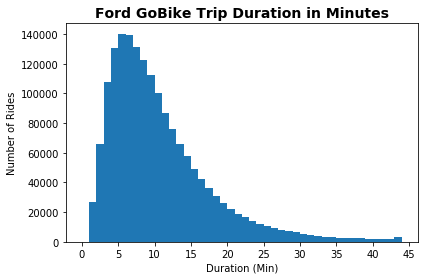

In [94]:
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data=df, x='duration_min', bins=bin_edges);

plt.title("Ford GoBike Trip Duration in Minutes", fontsize=14, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Rides');


* Trip duration data is right skewed with a mean of nearly 10 minutes. It indicates people ride bikes mainly within a short distance.

**Question**

* What is the distribution of user's age?

**Code**

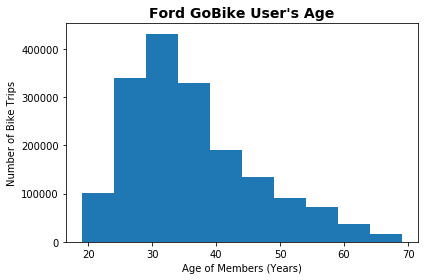

In [95]:
plt.hist(data=df, x='member_age');
plt.title("Ford GoBike User's Age", fontsize=14, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

* Majority of the users falls between the age of 25 to 40.

**Question**

* What is the users' proportion of different genders?

**Code**

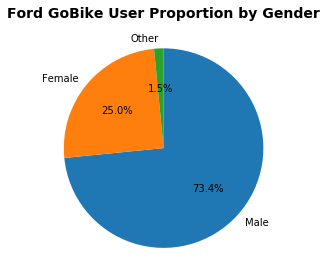

In [98]:
user_gender = df.member_gender.value_counts()
labels=['Male', 'Female', 'Other']
plt.pie(user_gender, labels=labels, startangle=90, 
        autopct= '%1.1f%%', counterclock = False);

plt.title('Ford GoBike User Proportion by Gender', fontsize=14, fontweight='bold');

* 73.4% of the users are male, while 25.0% of the users are female and 1.5% of the users are other genders.

**Question**

* What is the users' proportion by user type (customer or subscriber)?

**Code**


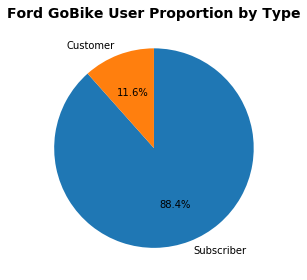

In [99]:
user_type = df.user_type.value_counts()
labels=['Subscriber', 'Customer']
plt.pie(user_type, labels=labels, startangle=90, 
        autopct= '%1.1f%%', counterclock = False);

plt.title('Ford GoBike User Proportion by Type', fontsize=14, fontweight='bold');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Every thing is fine for now.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, as the user ages have some unrealistic outliers that higher than 100 years old, to filter those outliers our, I chose a threshold of 69 years old which already covered 99.5% of the user. 

## 3. Bivariate Exploration


**Question**

* Is the Ford GoBike Monthly Usage different by Gender?

**Code**

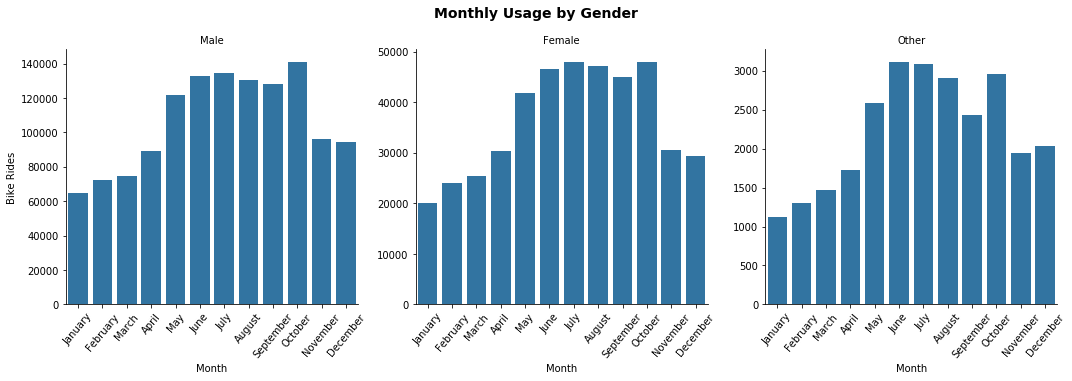

In [102]:
g = sns.catplot(data=df, x='start_time_month', col="member_gender", kind='count', 
                sharey=False, color=base_color)
g.set_axis_labels("Month", "Bike Rides")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=50)
g.fig.suptitle('Monthly Usage by Gender', y=1.05, fontsize=14, fontweight='bold');

* Those distributions are nearly the same. 

**Question**

* Is the Ford GoBike Weekly Usage different by gender?

**Code**

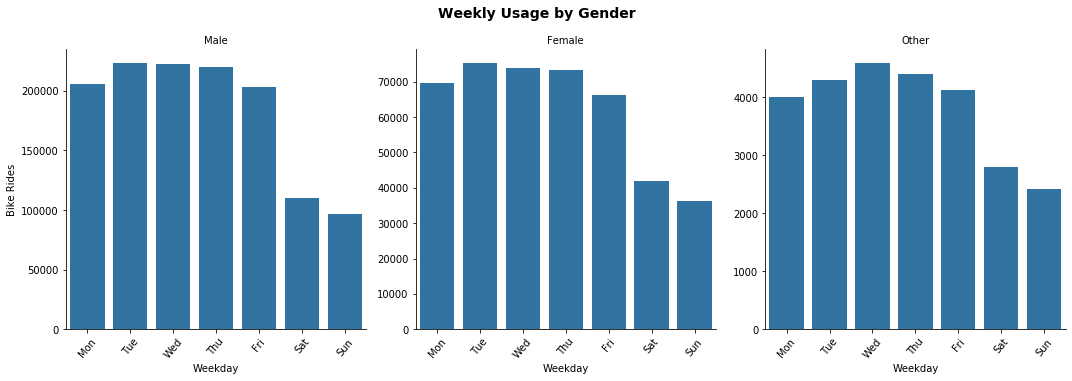

In [105]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='start_time_weekday', col="member_gender", kind='count', 
                sharey=False, color=base_color, order=weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=50)
g.fig.suptitle('Weekly Usage by Gender', y=1.05, fontsize=14, fontweight='bold');

* Those distributions are nearly the same. 

**Question**

* Is the Ford GoBike Monthly Usage different by user type(subscriber and customer)?

**Code**

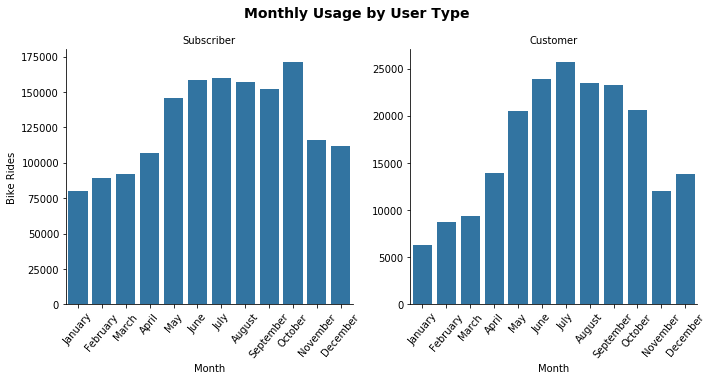

In [103]:
g = sns.catplot(data=df, x='start_time_month', col="user_type", kind='count', 
                sharey=False, color=base_color)
g.set_axis_labels("Month", "Bike Rides")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=50)
g.fig.suptitle('Monthly Usage by User Type', y=1.05, fontsize=14, fontweight='bold');

* The distributions remain the same. So, there is no need to adjust the advertising strategy for different user types.

**Question**

* Is the Ford GoBike Weekly Usage different by user type(subscriber and customer)?

**Code**

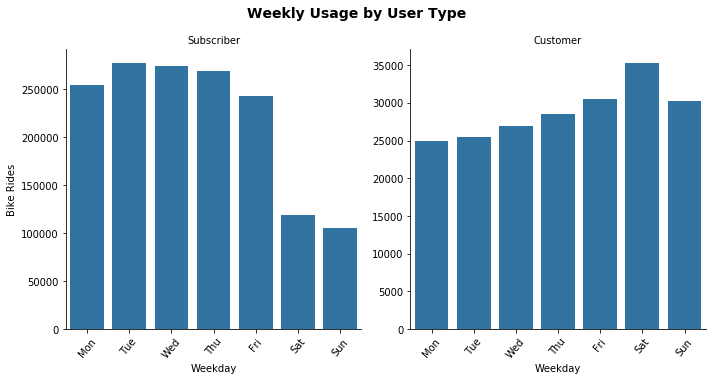

In [114]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='start_time_weekday', col="user_type", kind='count', 
                sharey=False, color=base_color, order=weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=50)
g.fig.suptitle('Weekly Usage by User Type', y=1.05, fontsize=14, fontweight='bold');

* We get some findings here! Compared with subscribers, customers are more likely to ride on weekends. Providing promotions for customers on weekends might be a reasonable way to increasing the revenue.

**Question**

* Is the Ford GoBike Hourly Usage different by user type(subscriber and customer)?

**Code**

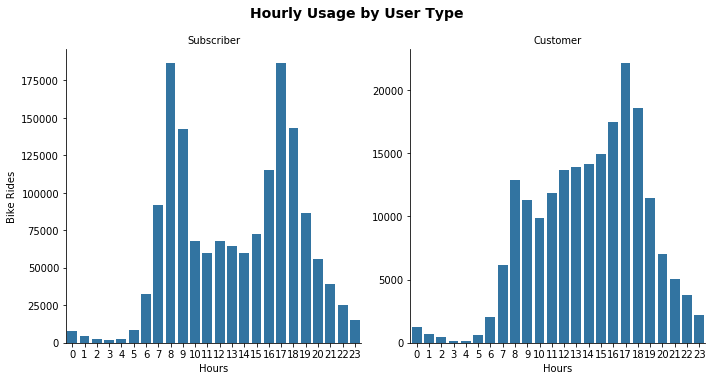

In [115]:
g = sns.catplot(data=df, x='start_time_hour', col="user_type", kind='count', 
                sharey=False, color=base_color)
g.set_axis_labels("Hours", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly Usage by User Type', y=1.05, fontsize=14, fontweight='bold');

* Yes, seem like customers ride bike often in between 8 am to 7 pm, while subscribers often ride bike on rush hours.

**Question**

* Is the duration time per ride different between user types?

**Code**

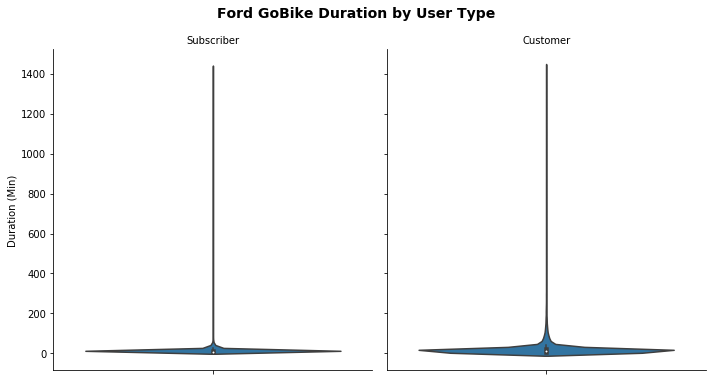

In [107]:
g = sns.catplot(data=df, y='duration_min', col="user_type", kind='violin', color=base_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford GoBike Duration by User Type', y=1.05, fontsize=14, fontweight='bold');

These distributions is skewed, I should build this visualization again with data subset of duration_min lower than 60 minutes.

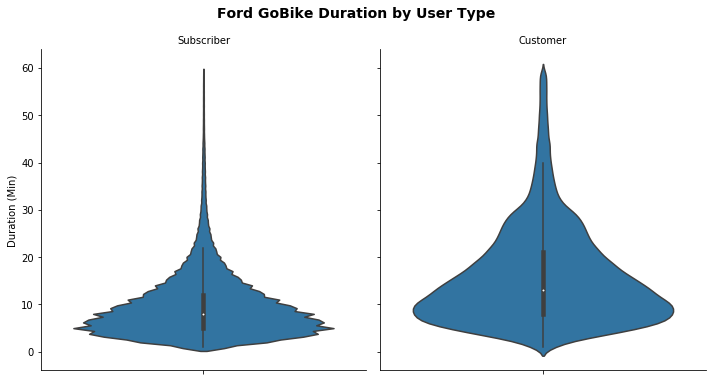

In [109]:
low_duration = df.query('duration_min < 60')
g = sns.catplot(data=low_duration, y='duration_min', col="user_type", kind='violin', color=base_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford GoBike Duration by User Type', y=1.05, fontsize=14, fontweight='bold');

* On average, customers tend to spend more time per ride compared with subscribers. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Generally, people tend to ride more in summer and autumn, rush hour, and weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is some difference of the bike usage between customers and subscribers: customers tend to spend more time per ride, and more likely to ride on weekends instead of weekdays.

## 4. Multivariate Exploration


**Question**

* What is the monthly bike usage by user type and then by gender?

**Code**

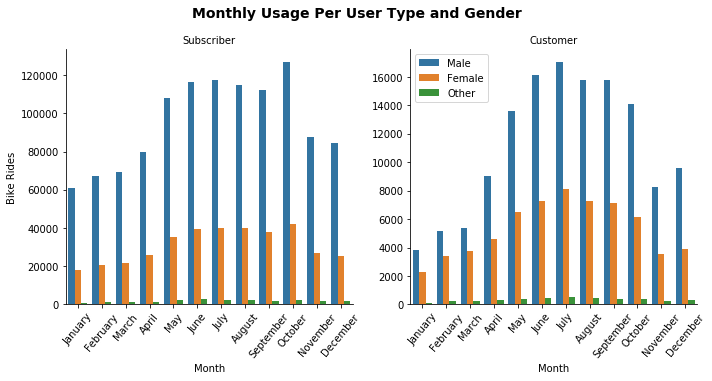

In [127]:
g = sns.catplot(data=df, x='start_time_month', col="user_type", hue="member_gender", 
                kind='count', sharey=False, legend=False)
g.set_axis_labels("Month", "Bike Rides")
g.set_xticklabels(rotation=50)
g.set_titles("{col_name}")
plt.legend(loc='upper left')
g.fig.suptitle('Monthly Usage Per User Type and Gender', y=1.05, fontsize=14, fontweight='bold');

* The plot shows no much difference compared with the bivariate one, we can say that gender and user type have no interactions on monthly usage of Ford GoBike. There is another point we can see from the plot that customer has higher female proportion than subscribers.

**Question**

* What is the weekly bike usage by user type and then by gender?

**Code**

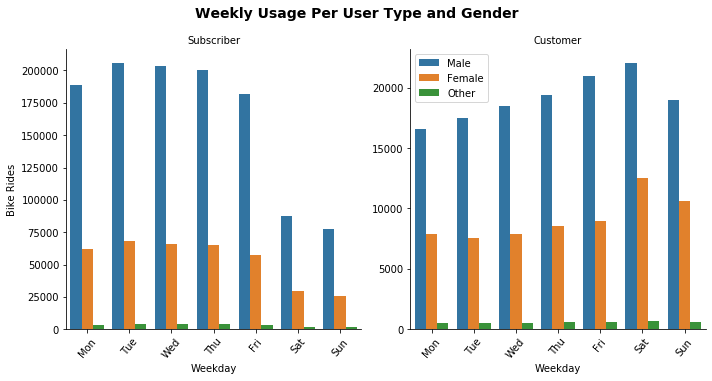

In [128]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='start_time_weekday', col="user_type", hue="member_gender", 
                kind='count', sharey=False, legend=False, order=weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_xticklabels(rotation=50)
g.set_titles("{col_name}")
plt.legend(loc='upper left')
g.fig.suptitle('Weekly Usage Per User Type and Gender', y=1.05, fontsize=14, fontweight='bold');

* There is no much difference compared with the bivariate plot.

**Question**

* What is the hourly bike usage by user type and then by gender?

**Code**

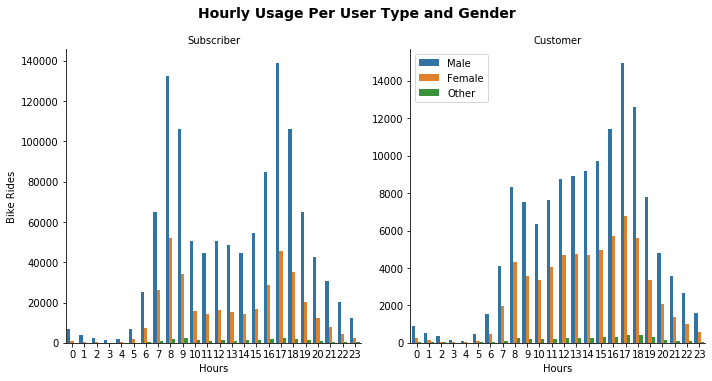

In [129]:
g = sns.catplot(data=df, x='start_time_hour', col="user_type", hue="member_gender", 
                kind='count', sharey=False, legend=False)
g.set_axis_labels("Hours", "Bike Rides")

g.set_titles("{col_name}")
plt.legend(loc='upper left')
g.fig.suptitle('Hourly Usage Per User Type and Gender', y=1.05, fontsize=14, fontweight='bold');

* No new findings compared with the bivariate plot.

**Question**

* Since the main different between subscriber and customer is on hours and weekdays, we can build a heat map with weekday and hour to illustrate the different trend of riding Ford GoBike between them.

**Code**

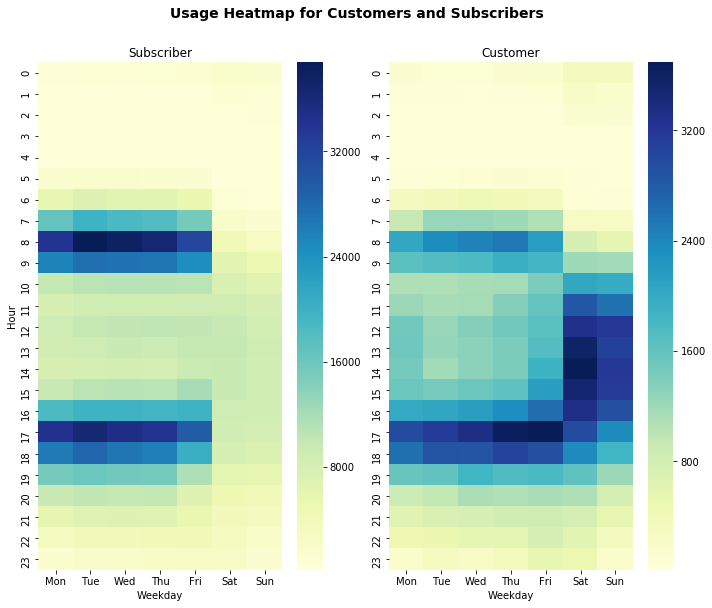

In [135]:
df['start_time_weekday'] = pd.Categorical(df['start_time_weekday'], 
                                          categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                          ordered=True)
plt.figure(figsize=(10, 8))
plt.suptitle('Usage Heatmap for Customers and Subscribers', y=1.05, fontsize=14, fontweight='bold')



# plot for subscriber
plt.subplot(1, 2, 1)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="YlGnBu")

plt.title('Subscriber', y=1.01)
plt.xlabel('Weekday')
plt.ylabel('Hour')

# plot for customer
plt.subplot(1, 2, 2)
df_customer = df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="YlGnBu")

plt.title('Customer', y=1.01)
plt.xlabel('Weekday')
plt.ylabel('');

* This plot an appropriate example of how multi-dimensional visualization can carry more information. According to the heat map, we can conclude those popular time periods for customer to ride Ford GoBike are 5 pm in weekdays and 11 am to 5 pm in weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The findings in bivariate exploratory part are proven to be right in multivariate exploratory part. In the heat map, I found that is a good example of how multi-dimensional visualization can carry more information if appropriate encoding was used. According to these plot, there is a different trend between subscribers and customers that the most popular time periods for customer to ride Ford GoBike are 5 pm in weekdays and 11 am to 5 pm in weekends while subscriber's is rush hours in weekdays. Based on that, I think there are bunch of promotional actions can be applied to increase the revenue get from customers.

### Were there any interesting or surprising interactions between features?

> No, there are no interactions.